### Step 1 

Set up enviroment and load in data

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [235]:
df = pd.read_csv('data/train.csv')

print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2

EDA (exploratory data analysis) & Data preparation

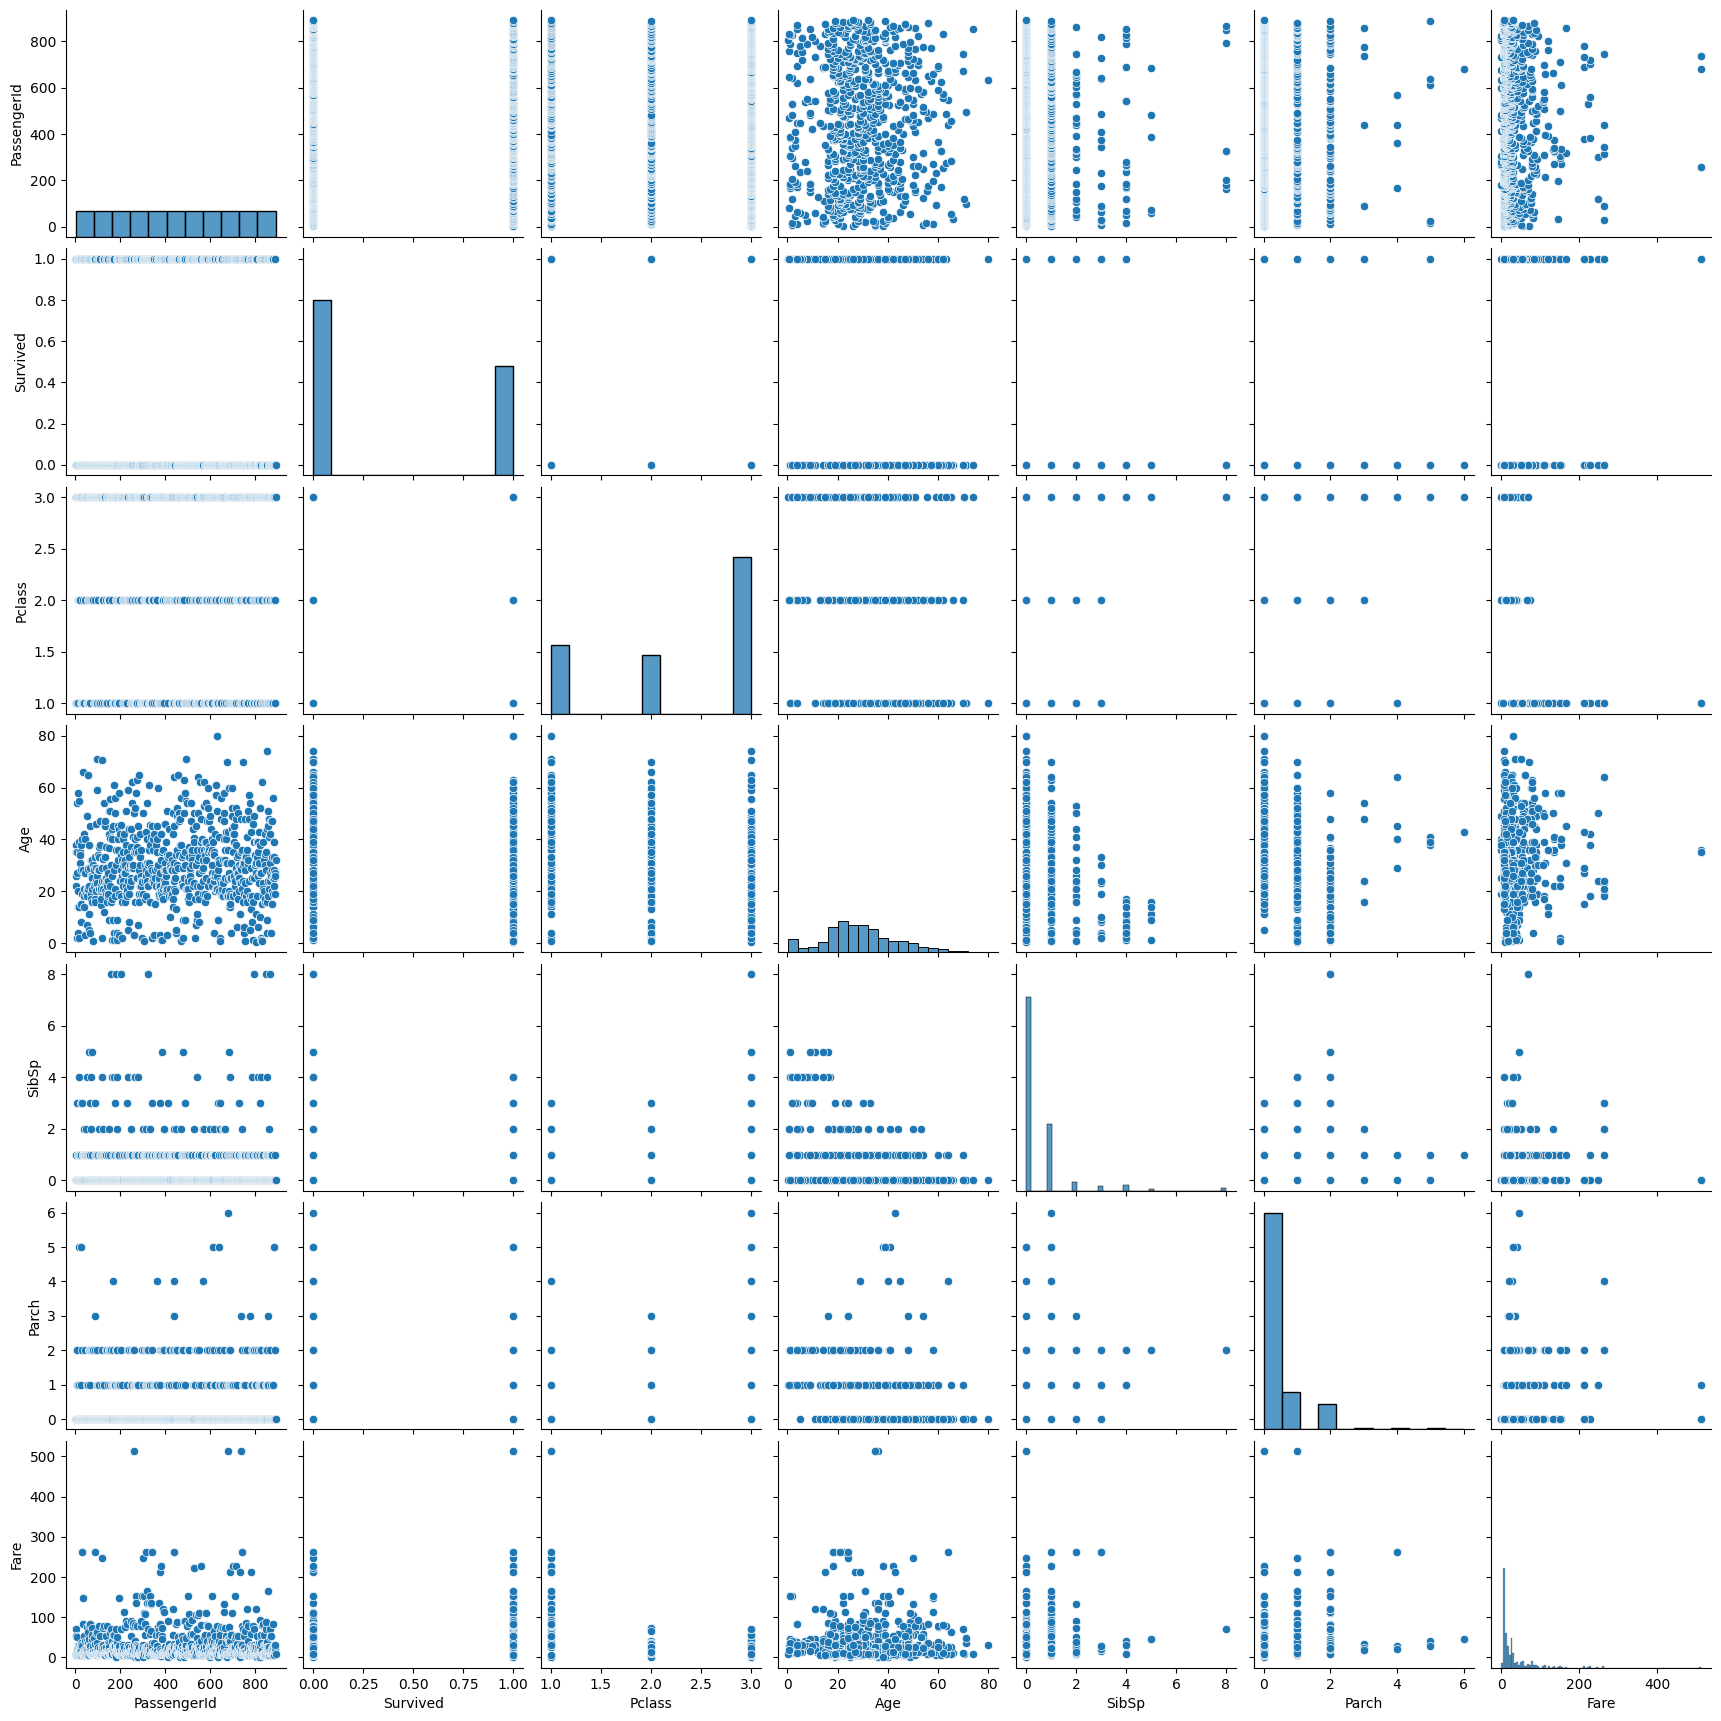

In [236]:
sns.pairplot(df)

In [237]:
df = df.drop(columns=['Name','Ticket','Cabin','Embarked'], axis=1)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


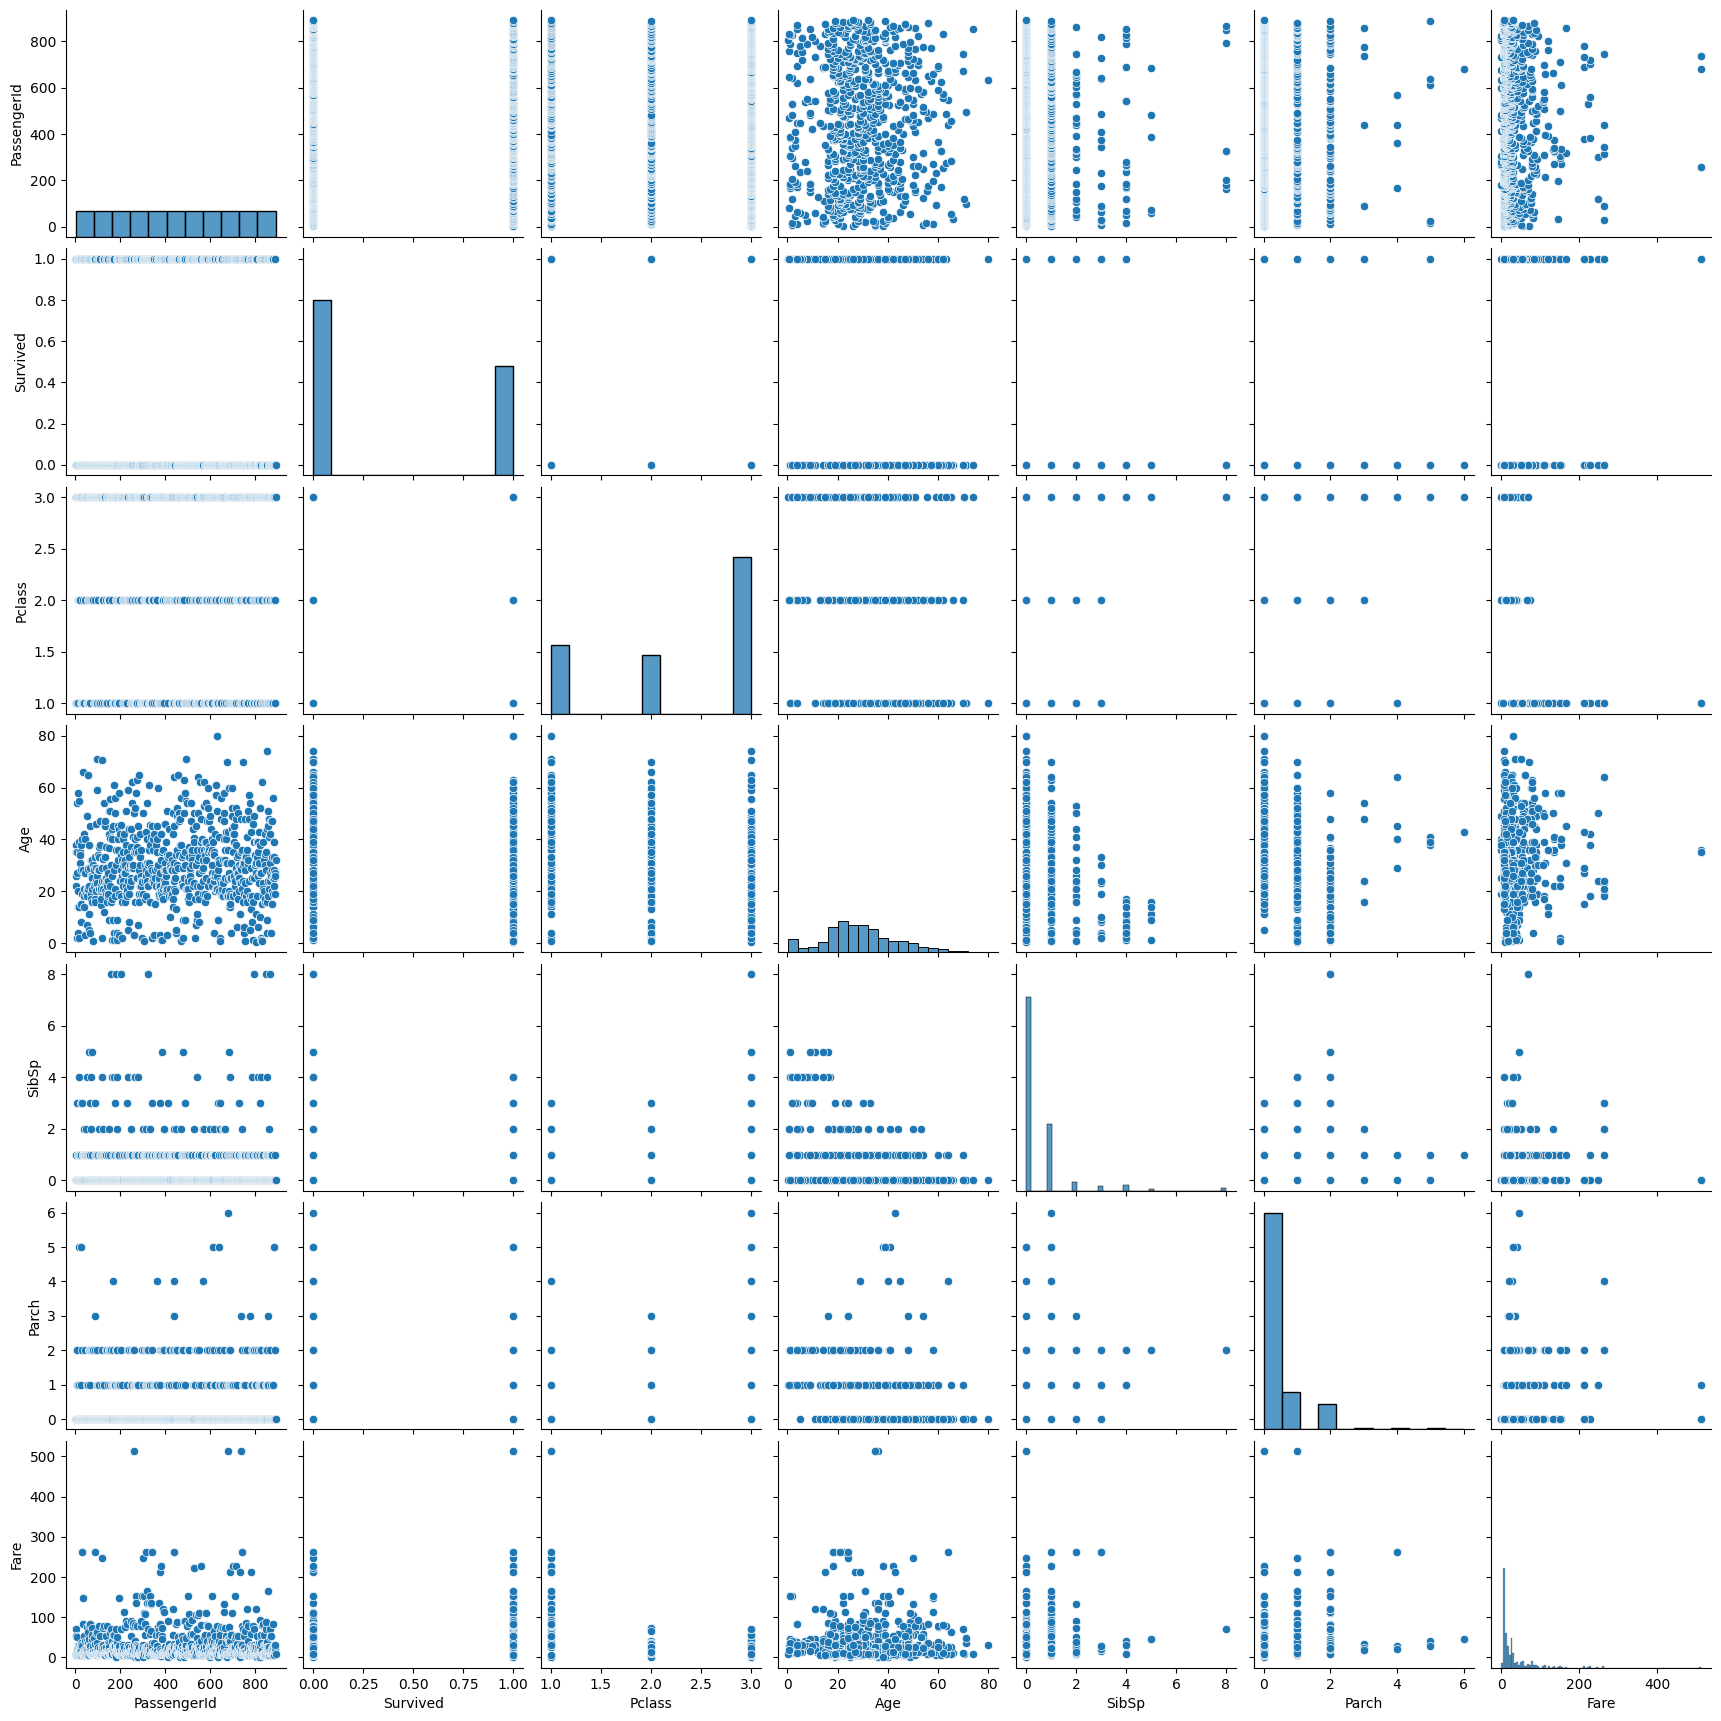

In [239]:
sns.pairplot(df)

In [240]:
df['Dependants'] = df['Parch'] + df['SibSp']

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Dependants
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,1
4,5,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0
887,888,1,1,female,19.0,0,0,30.0000,0
888,889,0,3,female,NaN,1,2,23.4500,3
889,890,1,1,male,26.0,0,0,30.0000,0


In [241]:
df = df.drop(['SibSp', 'Parch'], axis=1)

df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Dependants
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,1
2,3,1,3,female,26.0,7.9250,0
3,4,1,1,female,35.0,53.1000,1
4,5,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,0
887,888,1,1,female,19.0,30.0000,0
888,889,0,3,female,NaN,23.4500,3
889,890,1,1,male,26.0,30.0000,0


In [242]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Dependants
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,0
887,888,1,1,0,19.0,30.0000,0
888,889,0,3,0,NaN,23.4500,3
889,890,1,1,1,26.0,30.0000,0


In [243]:
df['Age'] = df['Age'].fillna((df['Age'].mean()))

df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Dependants
0,1,0,3,1,22.000000,7.2500,1
1,2,1,1,0,38.000000,71.2833,1
2,3,1,3,0,26.000000,7.9250,0
3,4,1,1,0,35.000000,53.1000,1
4,5,0,3,1,35.000000,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,13.0000,0
887,888,1,1,0,19.000000,30.0000,0
888,889,0,3,0,29.699118,23.4500,3
889,890,1,1,1,26.000000,30.0000,0


<Axes: >

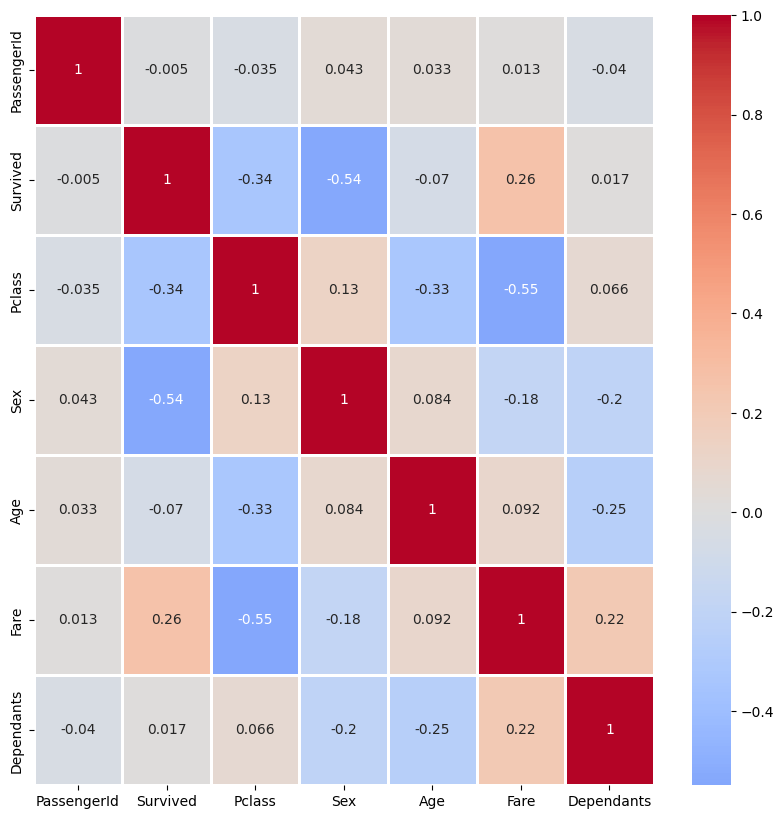

In [244]:
#Creating an axes to draw the heatmeap

fig, ax = plt.subplots(figsize=(10,10))

#plotting the heatmap on the axes

sns.heatmap(df.corr(method='pearson'),
            annot=True,
            center=0.0,
            linewidths=0.8,
            ax=ax,
            cmap='coolwarm')

### Step 3

Building the Model

In [245]:
target = df['Survived']
features = list(set(df.columns) - {'Survived'})

X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.3, random_state=14)



In [246]:
# Decide whether to scale (normalise/standardise) numeric features.

cols_to_scale = ['Pclass','Sex','Age','Fare','Dependants']

In [247]:
# Calling the method twice once for features and once for target

scaler = StandardScaler()
scaler_target = StandardScaler()

# Fitting the scaler on the training features and applying it to both training and test data

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [248]:
cols = ['PassengerId','Dependants','Sex','Age','Fare','Pclass']

lr = LogisticRegression()

lr.fit(X_train[cols],y_train)

C:\Users\moemahmed2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [249]:
y_prd_lr = lr.predict(X_test[cols])

In [250]:
y_prd_lr

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0])

### Step 4

check model's classification report and confusion matrix

In [251]:
print('Logistic Regression')

print(classification_report(y_test, y_prd_lr, target_names=['Did not survive','Survived']))

Logistic Regression
                 precision    recall  f1-score   support

Did not survive       0.84      0.83      0.84       168
       Survived       0.72      0.73      0.73       100

       accuracy                           0.79       268
      macro avg       0.78      0.78      0.78       268
   weighted avg       0.80      0.79      0.79       268



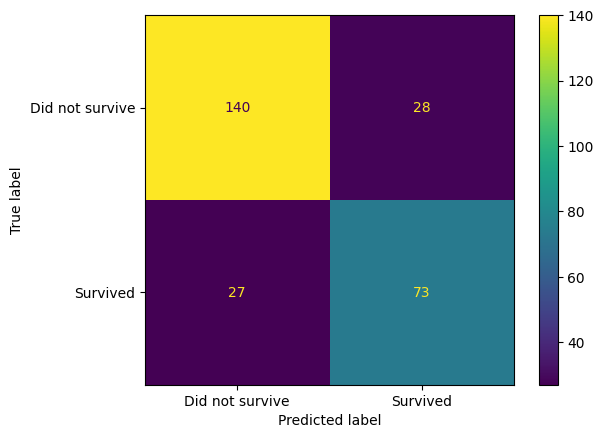

In [252]:
predictions = y_prd_lr
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Did not survive','Survived'))
disp.plot()

### Step 5 

Load test dataset, perform predictions with model and save output in CSV before submitting to Kaggale

In [253]:
test_df = pd.read_csv('data/test.csv')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [254]:
test_df = test_df.drop(columns=['Name','Ticket','Cabin','Embarked'], axis=1)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [255]:
test_df['Dependants'] = test_df['Parch'] + test_df['SibSp']

test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Dependants
0,892,3,male,34.5,0,0,7.8292,0
1,893,3,female,47.0,1,0,7.0000,1
2,894,2,male,62.0,0,0,9.6875,0
3,895,3,male,27.0,0,0,8.6625,0
4,896,3,female,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,0
414,1306,1,female,39.0,0,0,108.9000,0
415,1307,3,male,38.5,0,0,7.2500,0
416,1308,3,male,NaN,0,0,8.0500,0


In [256]:
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

test_df

,PassengerId,Pclass,Sex,Age,Fare,Dependants
0,892,3,male,34.5,7.8292,0
1,893,3,female,47.0,7.0000,1
2,894,2,male,62.0,9.6875,0
3,895,3,male,27.0,8.6625,0
4,896,3,female,22.0,12.2875,2
...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,0
414,1306,1,female,39.0,108.9000,0
415,1307,3,male,38.5,7.2500,0
416,1308,3,male,NaN,8.0500,0


In [257]:
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

test_df



,PassengerId,Pclass,Sex,Age,Fare,Dependants
0,892,3,1,34.5,7.8292,0
1,893,3,0,47.0,7.0000,1
2,894,2,1,62.0,9.6875,0
3,895,3,1,27.0,8.6625,0
4,896,3,0,22.0,12.2875,2
...,...,...,...,...,...,...
413,1305,3,1,NaN,8.0500,0
414,1306,1,0,39.0,108.9000,0
415,1307,3,1,38.5,7.2500,0
416,1308,3,1,NaN,8.0500,0


In [258]:
test_df['Age'] = test_df['Age'].fillna((df['Age'].median()))

test_df['Age'].median()

np.float64(29.69911764705882)

In [259]:
test_df['Fare'] = test_df['Fare'].fillna(method='ffill')

C:\Users\moemahmed2\AppData\Local\Temp\ipykernel_28708\4009841784.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df['Fare'] = test_df['Fare'].fillna(method='ffill')


In [260]:
test_df.shape

(418, 6)

In [261]:
scaler = StandardScaler()

X_final_test = scaler.fit_transform(test_df)

In [262]:
test_df.shape

(418, 6)

In [263]:
y_final_prd = lr.predict(X_final_test)

C:\Users\moemahmed2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [264]:
y_final_prd.shape

(418,)

In [265]:
y_final_prd

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [266]:
final_df = pd.DataFrame(test_df['PassengerId'])

final_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [267]:
final_df['Survived'] = y_final_prd

final_df.to_csv('data/predictions.csv', index=False)

In [268]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
